#**PHASE 2**

# Importing Libraries

In [3]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [4]:
#loading the clean Data set after performing cleaning and EDA in the phase 1
import pandas as pd
df1 = pd.read_csv('/content/cleaned_data.csv')


In [5]:
#Seperating features and target values

features = df1[df1.columns.drop(['HeartDisease','RestingBP','RestingECG'])].values
target = df1['HeartDisease'].values

#Using Scikit Learn to Split the data  into training and test set.
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 2)

- Selecting the features from the above conducted tests and splitting the data into **80 - 20 train - test** groups.

---



# Creating Pipeline

Created a Pipeline to streamline the process of fiting model and predcting on test data.

In [6]:
yes = df1[df1['HeartDisease'] == 1].describe().T
no = df1[df1['HeartDisease'] == 0].describe().T
colors = ['viridis']

In [7]:
def model(classifier):

    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    RocCurveDisplay.from_estimator(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier):

    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'viridis',fmt ='')

    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

#Creating a pipeline for pr_curve
def pr_curve(classifier):
    y_scores = classifier.predict_proba(x_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

    #precision and recall
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
    #Area Under the Curve (AUC) for precision-recall curve
    auc_score = auc(recall, precision)

    # Plot precision-recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

# 1) Linear Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
#initialize logistic regression classifier

classifier_log_reg = LogisticRegression(C=10,penalty= 'l2')

Accuracy :  86.96%
Cross Validation Score :  91.14%
ROC_AUC Score :  86.87%


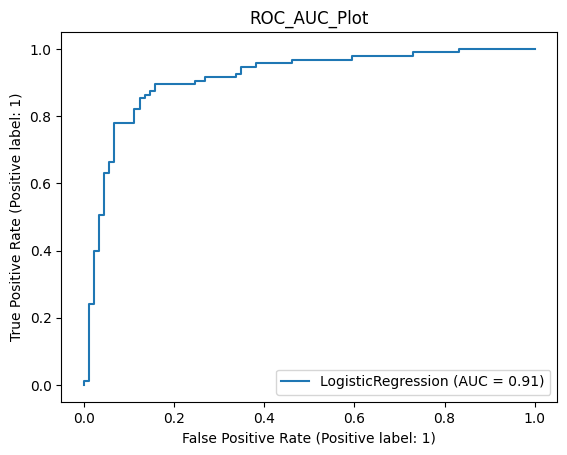

In [29]:
model(classifier_log_reg)

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        89
           1       0.86      0.89      0.88        95

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



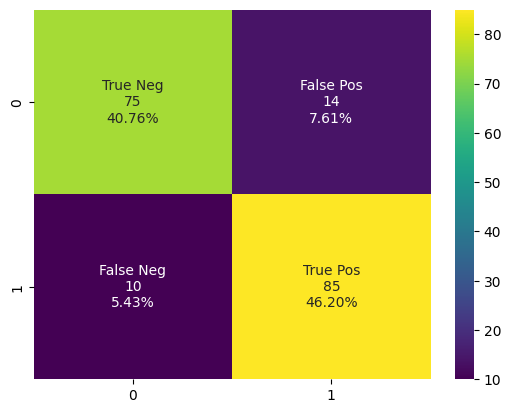

In [ ]:
model_evaluation(classifier_log_reg)

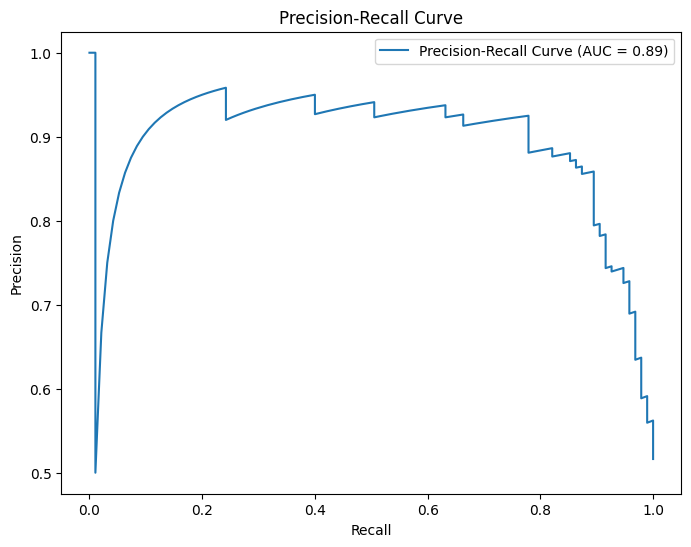

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
y_scores = classifier_log_reg.predict_proba(x_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)


# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
# Calculate Area Under the Curve (AUC) for precision-recall curve
auc_score = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()



# 2) SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:

from sklearn.model_selection import  GridSearchCV
from sklearn.svm import SVC
# Define the parameter grid to search
# Penalty parameter C of the error term
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.01, 0.1, 1, 10],  # Kernel coefficient for 'rbf'
              'kernel': ['rbf' ]}  # Kernel type

# Instantiate the SVM classifier
svm_model = SVC()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5)


# Fit the grid search to the data
grid_search.fit(x_train,y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the parameter grid to search
param_grid = {'C': [0.1, 1, 10, 100],  # Penalty parameter C of the error term
              'gamma': [0.01, 0.1, 1, 10],  # Kernel coefficient for 'rbf'
              'kernel': ['rbf']}  # Kernel types including 'linear'

# Instantiate the SVM classifier
svm_model = SVC()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Print the accuracy for each parameter combination
print("Accuracy for each parameter combination:")
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

# Print the best parameters found
print("\nBest Parameters:", grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Accuracy for each parameter combination:
0.563 (+/-0.005) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.563 (+/-0.005) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.563 (+/-0.005) for {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.563 (+/-0.005) for {'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}
0.634 (+/-0.057) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.647 (+/-0.083) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.564 (+/-0.007) for {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.563 (+/-0.005) for {'C': 1, 'gamma': 10, 'kernel': 'rbf'}
0.710 (+/-0.115) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.666 (+/-0.075) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.572 (+/-0.016) for {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.563 (+/-0.005) for {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
0.728 (+/-0.086) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.666 (+/-0.075) for {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.572 (+/-0.016) for {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
0.563 (+/-0.005) for {'C': 100, '

In [ ]:
classifier_svc = SVC(kernel = 'rbf',C = 100.0 , gamma = 0.01)

In [ ]:
classifier_svc = SVC(kernel = 'linear',C = 0.1)

Accuracy :  87.50%
Cross Validation Score :  90.46%
ROC_AUC Score :  87.43%


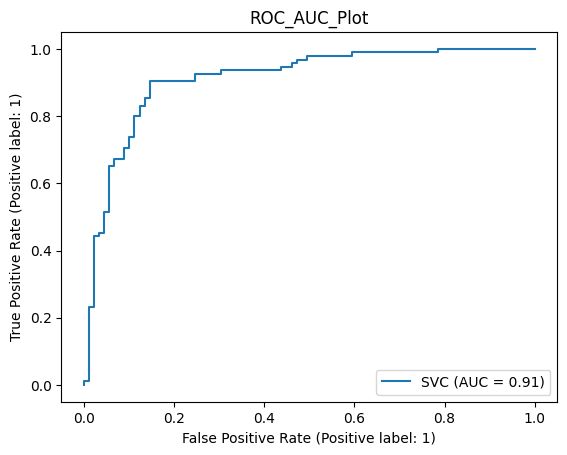

In [ ]:
model(classifier_svc)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        89
           1       0.87      0.89      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



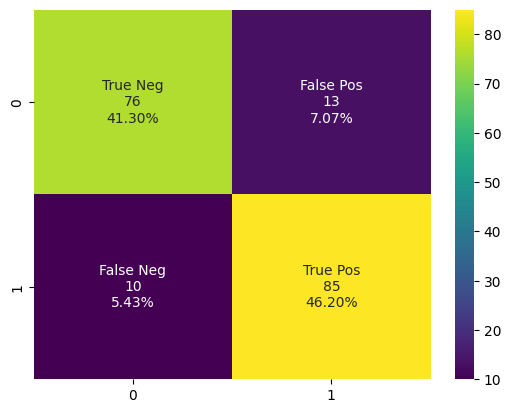

In [ ]:
model_evaluation(classifier_svc)

In [ ]:
pr_curve(classifier_svc)

# 3) Decision Tree

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Define different parameters for Decision Tree
parameters = {'max_depth': [None, 5, 10],    # Maximum depth of the tree
              'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
              'min_samples_leaf': [1, 2, 4]}  # Minimum number of samples required to be at a leaf node

# Iterate over different parameter combinations
for max_depth in parameters['max_depth']:
    for min_samples_split in parameters['min_samples_split']:
        for min_samples_leaf in parameters['min_samples_leaf']:
            # Initialize Decision Tree classifier with current parameters
            dt_classifier = DecisionTreeClassifier(max_depth=max_depth,
                                                    min_samples_split=min_samples_split,
                                                    min_samples_leaf=min_samples_leaf)
            # Train the Decision Tree classifier
            dt_classifier.fit(x_train, y_train)

            # Predict on the test set
            y_pred = dt_classifier.predict(x_test)

            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_pred)

            # Print the parameters and accuracy
            print(f"Parameters: max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}")
            print(f"Accuracy: {accuracy}\n")


Parameters: max_depth=None, min_samples_split=2, min_samples_leaf=1
Accuracy: 0.8206521739130435

Parameters: max_depth=None, min_samples_split=2, min_samples_leaf=2
Accuracy: 0.8260869565217391

Parameters: max_depth=None, min_samples_split=2, min_samples_leaf=4
Accuracy: 0.842391304347826

Parameters: max_depth=None, min_samples_split=5, min_samples_leaf=1
Accuracy: 0.842391304347826

Parameters: max_depth=None, min_samples_split=5, min_samples_leaf=2
Accuracy: 0.7771739130434783

Parameters: max_depth=None, min_samples_split=5, min_samples_leaf=4
Accuracy: 0.8369565217391305

Parameters: max_depth=None, min_samples_split=10, min_samples_leaf=1
Accuracy: 0.8369565217391305

Parameters: max_depth=None, min_samples_split=10, min_samples_leaf=2
Accuracy: 0.8260869565217391

Parameters: max_depth=None, min_samples_split=10, min_samples_leaf=4
Accuracy: 0.8369565217391305

Parameters: max_depth=5, min_samples_split=2, min_samples_leaf=1
Accuracy: 0.8586956521739131

Parameters: max_depth=

Accuracy :  85.87%
Cross Validation Score :  88.76%
ROC_AUC Score :  85.82%


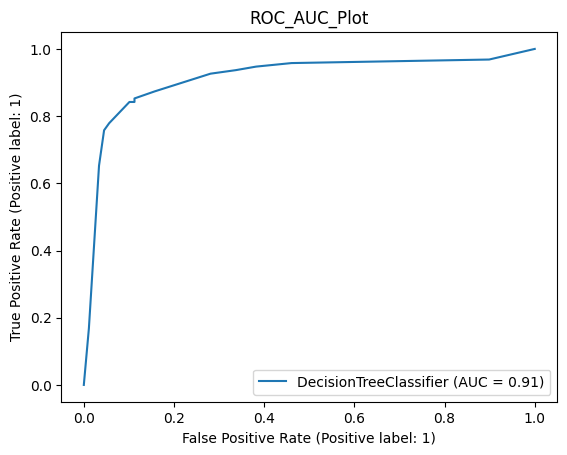

In [ ]:
dt2_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=2 )

dt2_classifier.fit(x_train, y_train)
model(dt2_classifier)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        89
           1       0.86      0.87      0.86        95

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



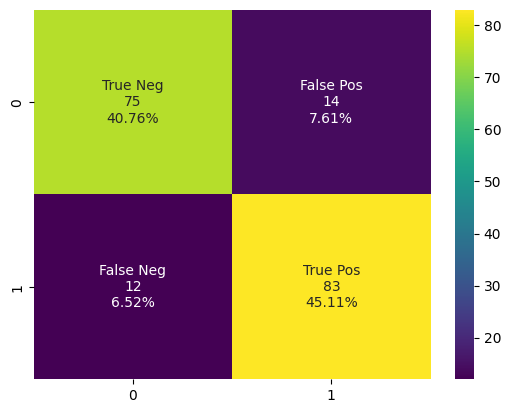

In [ ]:
model_evaluation(dt2_classifier)

In [ ]:
pr_curve(dt2_classifier)

# 4) XG Boost

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.8}
Accuracy of XGBoost alongside desicion tree:  86.41%
XGBoost with decision tree Cross-Validation Accuracy: 89.11%
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        89
           1       0.84      0.92      0.87        95

    accuracy                           0.86       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184

[0]	validation_0-logloss:0.67481
[1]	validation_0-logloss:0.65615
[2]	validation_0-logloss:0.64064
[3]	validation_0-logloss:0.62088
[4]	validation_0-logloss:0.60255
[5]	validation_0-logloss:0.58491
[6]	validation_0-logloss:0.56906
[7]	validation_0-logloss:0.55564
[8]	validation_0-logloss:0.54435
[9]	validation_0-logloss:0.53231
[10]	validation_0-logloss:0.51961
[11]	validation_0-logloss:0.50798
[12]	

XGBClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                    min_samples_leaf=2,
                                                    min_samples_split=10),
              base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

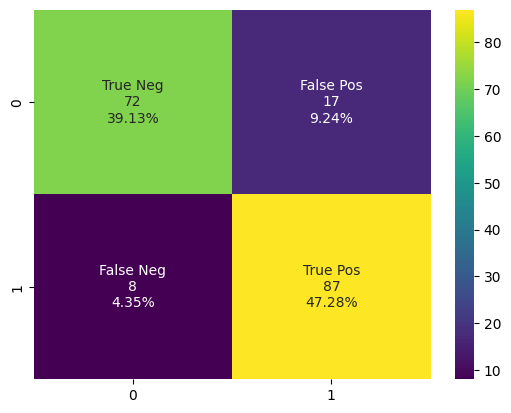

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer


# parameter grid for GridSearchCV - hyperparameter tuning in paramater grid
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [100, 200, 300]
}


# Initialize XGBoost classifier alongside decision tree classifier - dt2_classifier
classifier_xgboost = XGBClassifier(base_estimator=dt2_classifier, objective='binary:logistic', random_state=1000)


# Accuracy scorer using GridSearchCV
scorer = make_scorer(accuracy_score)

# Initialize GridSearchCV
grid_search = GridSearchCV(classifier_xgboost, param_grid=param_grid, scoring=scorer, cv=5)

# Fit the model with grid search
grid_search.fit(x_train, y_train)


# Get the best estimator
best_xgboost = grid_search.best_estimator_

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

#cross-validation to evaluate model accuracy with newer data
xgb_cv_accuracy = cross_val_score(best_xgboost, x_train, y_train, cv=5, scoring='accuracy')
prediction = grid_search.predict(x_test)
print("Accuracy of XGBoost alongside desicion tree: ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))

print("XGBoost with decision tree Cross-Validation Accuracy: {:.2%}".format(np.mean(xgb_cv_accuracy)))

# Evaluate the model using model_evaluation function
model_evaluation(best_xgboost)


# feature importance to indicate best feature.
feature_importances = best_xgboost.feature_importances_

# implement early stopping to avoid overfitting of the data
best_xgboost.fit(x_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=[(x_test, y_test)])



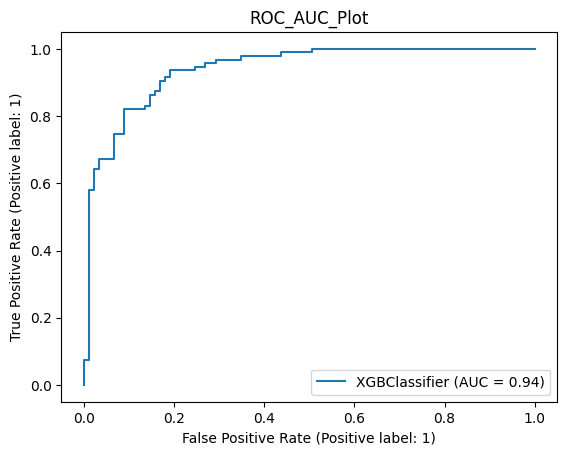

In [ ]:
# Plot ROC curve
RocCurveDisplay.from_estimator(best_xgboost, x_test,y_test)
plt.title('ROC_AUC_Plot')
plt.show()

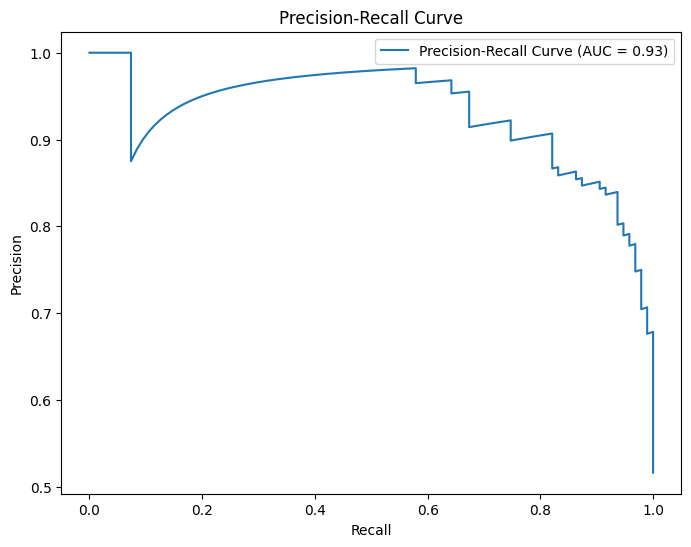

In [ ]:
pr_curve(dt2_classifier)

# 5) Random Forest

Accuracy :  84.24%
Cross Validation Score :  93.19%
ROC_AUC Score :  84.06%


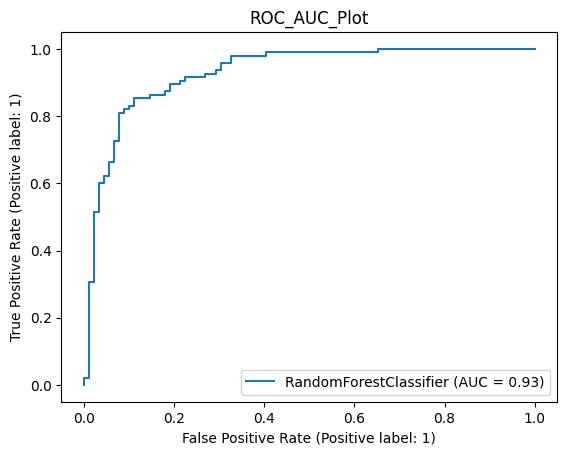

In [ ]:
# Importing the RandomForestClassifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier


# Initialising Random Forest Classifier with a max_depth = 4 and a random_state = 0.
# maximum depth controls the maximum depth of the tree prevent overfitting
# random_state make sures reproducibility of results by giving a seed to the random no. generator
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)


#  As model is a function defined above, this line calls the 'model' function,
# Here passing the Random Forest Classifier that is  'classifier_rf' as an argument in the model function.
# This step is to train the classifier with training data.
model(classifier_rf)

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        89
           1       0.82      0.89      0.85        95

    accuracy                           0.84       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



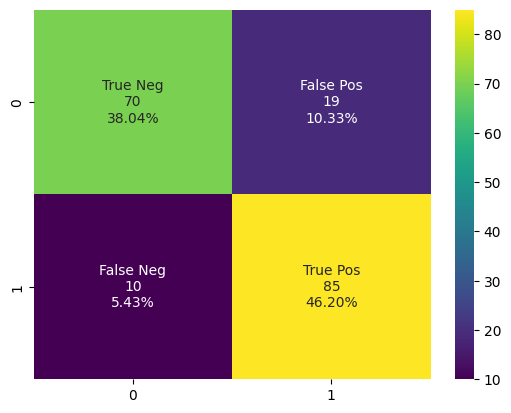

In [ ]:
model_evaluation(classifier_rf)

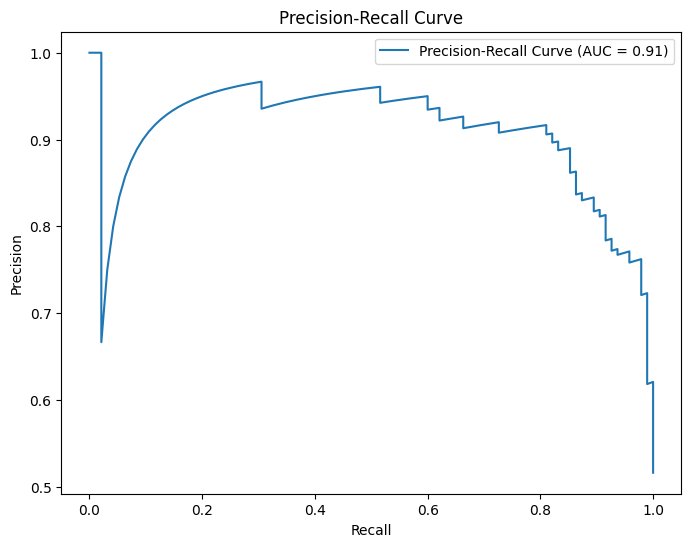

In [ ]:
pr_curve(classifier_rf)

# KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

def knn_model(k, distance):
    knn = KNeighborsClassifier(n_neighbors = k,metric = distance)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    scores = cross_val_score(knn,x_train,y_train,scoring = 'roc_auc',cv = cv,n_jobs = -1)
    return scores.mean()

# - Using the RepeatedStratifiedKFold cross validation technique to find the best K and distance metric values.
# - We will try the following distance metrics :
# Euclidian ,Manhattan , Minkowski

# - We will try the following K values :
# 1 ,3,5,7,9

results = []
for k in range(1,10,2):
    for distance in ['euclidean','manhattan','minkowski']:
        score = knn_model(k,distance)
        results.append({'K' : k,'Distance' : distance,'CV Score' : score})

df_results = pd.DataFrame(results)
df_results.sort_values(by = 'CV Score',ascending = False,inplace = True)
df_results.head()





,K,Distance,CV Score
7,5,manhattan,0.76
4,3,manhattan,0.76
10,7,manhattan,0.76
13,9,manhattan,0.75
1,1,manhattan,0.72


Accuracy :  75.54%
Cross Validation Score :  76.11%
ROC_AUC Score :  75.25%


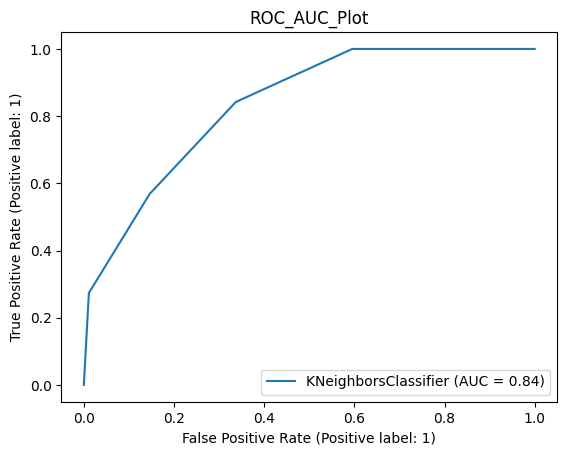

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5,metric = 'manhattan')
knn.fit(x_train,y_train)
model(knn)

              precision    recall  f1-score   support

           0       0.80      0.66      0.72        89
           1       0.73      0.84      0.78        95

    accuracy                           0.76       184
   macro avg       0.76      0.75      0.75       184
weighted avg       0.76      0.76      0.75       184



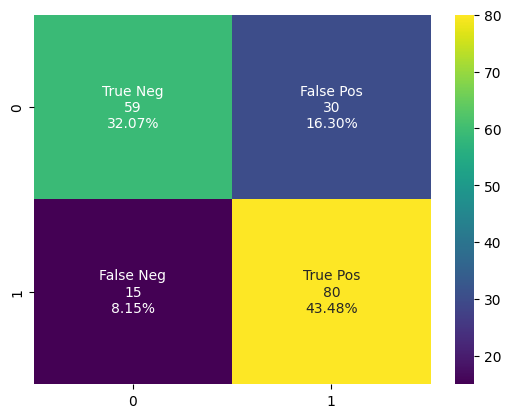

In [ ]:
model_evaluation(knn)

In [ ]:
#calculate missclassification rate for above model

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, knn.predict(x_test))
misclassification_rate = 1 - accuracy
print('Misclassification Rate:', misclassification_rate)


Misclassification Rate: 0.24456521739130432


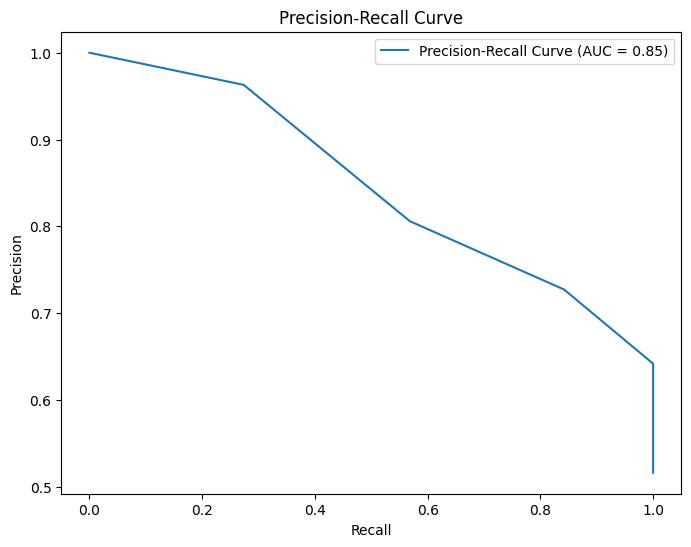

In [ ]:
pr_curve(knn)

# Naive Bayes

Accuracy :  86.41%
Cross Validation Score :  91.29%
ROC_AUC Score :  86.27%


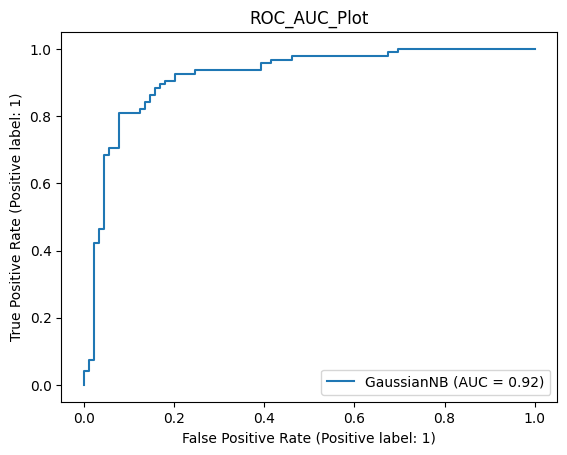

              precision    recall  f1-score   support

           0       0.89      0.82      0.85        89
           1       0.84      0.91      0.87        95

    accuracy                           0.86       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



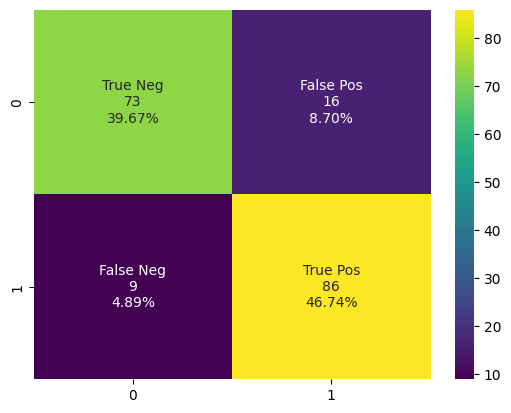

In [ ]:
#NaiveBayes_Algorithm
#Importing the GaussianNB from the scikit learn library. GaussianNB is used for Naive Bayes classification assuming Gaussian (normal) distribution of the data.
from sklearn.naive_bayes import GaussianNB

#variable of the GaussianNB classifier. This variable will be used to fit the model to the data and do prediction
classifier_nb = GaussianNB()

#model is a function defined above that fits the classifier to the training data.
model(classifier_nb)

# model_evaluation is a function defined above that computes the trained model on a test dataset.
model_evaluation(classifier_nb)

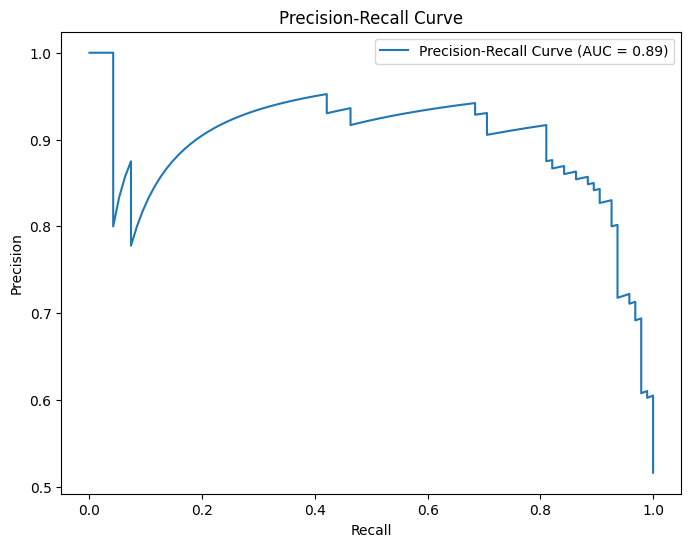

In [ ]:
pr_curve(classifier_nb )

#Neural Network

In [ ]:
#ANN_Algorithm
# Importing tensorFlow, a machine learning and numerical processing library.
import tensorflow as tf
from tensorflow import keras  # Importing keras API from TensorFlow library for neural networks building
#from tensorflow.keras importing layers
#Assigning the keras module from TensorFlow to a variable 'keras'.

import tensorflow as tf
keras = tf.keras
from keras import layers


# Defining a Sequential model
ANN_Model = keras.Sequential([
  layers.Dense(64, activation='relu', input_shape=(features.shape[1],)),  #dense layer with 64 units and the activattion of ReLU. input shape according to the feature size.
  layers.Dropout(0.2),  #dropout layer to reduce overfitting by dropping randomly selected neurons while training, here we are dropping 20%.
  layers.Dense(32, activation='relu'),  #another dense layer with 32 units and ReLU activation.
  layers.Dropout(0.2),  #another dropout layer, again dropping 20% to reduce overfitting.
  layers.Dense(1, activation='sigmoid')  #output layer with a sigmoid activation for binary classification.
])



In [ ]:
#Compiles the model
#specifying the optimizer, loss function, and metrics to monitor.
ANN_Model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#fits the model to the training data
#specifying the number of epochs to train, batch size, and validation data
ANN_Model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/100
23/23 [==============================] - 2s 19ms/step - loss: 9.0597 - accuracy: 0.5436 - val_loss: 1.5571 - val_accuracy: 0.5217
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 6.3973 - accuracy: 0.5163 - val_loss: 0.7246 - val_accuracy: 0.5163
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 3.2902 - accuracy: 0.5545 - val_loss: 0.7385 - val_accuracy: 0.5435
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 2.3576 - accuracy: 0.5259 - val_loss: 0.6913 - val_accuracy: 0.5761
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 1.7407 - accuracy: 0.5232 - val_loss: 0.6964 - val_accuracy: 0.5163
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 1.4076 - accuracy: 0.5027 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 7/100
23/23 [==============================] - 0s 6ms/step - loss: 1.2184 - accuracy: 0.5245 - val_loss: 0.6917 - val_accuracy: 0.5163
Epoch 8/100


#Comparing All models

In [23]:
import pandas as pd
df2 = pd.read_excel('/content/Evaluation_Metrics.xlsx')
df2.head(9)

,Sr. No.,ML Algorithm,Accuracy,Precision,Recall
0,1,Logistic Regression,0.87,0.86,0.89
1,2,Support Vector Classifier,0.88,0.87,0.89
2,3,Decision Tree Classifier,0.86,0.86,0.87
3,4,Random Forest Classifier,0.84,0.82,0.89
4,5,K-Nearest Neighbors Classfier,0.86,0.83,0.92
5,6,Artificial Neural Network,0.91,0.82,0.89
6,7,Naive Bayes,0.86,0.84,0.91
7,8,XGBoost,0.86,0.84,0.92


In [30]:
import altair as alt
alt.Chart(df2).mark_bar().encode(
    y='ML Algorithm',
    x='Recall',
    color='ML Algorithm'
).properties(width=600, height=300)


alt.Chart(...)